# AbstentionBench Data Analysis

This notebook provides a detailed analysis of abstention (refusal to answer) performance of Large Language Models (LLMs) on AbstentionBench.

## Analysis Objectives:
1. Explore and understand the data structure
2. Analyze performance by model
3. Analyze performance by scenario
4. Analyze performance by dataset
5. Analyze the impact of post-training stage
6. Visualization and insights


In [7]:
!pip install seaborn

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import warnings
warnings.filterwarnings('ignore')

# Cấu hình visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Đường dẫn đến file dữ liệu (sử dụng đường dẫn tương đối từ thư mục analysis)
current_dir = Path(os.getcwd())
if current_dir.name == 'analysis':
    DATA_PATH = current_dir / "abstention_performance.csv"
else:
    # Nếu đang chạy từ thư mục gốc
    DATA_PATH = current_dir / "analysis" / "abstention_performance.csv"

print(f"Đường dẫn file dữ liệu: {DATA_PATH}")
print(f"File tồn tại: {DATA_PATH.exists()}")


Đường dẫn file dữ liệu: /home/admin1/Desktop/AbstentionBench/analysis/abstention_performance.csv
File tồn tại: True


## 1. Tải và khám phá dữ liệu


In [ ]:
# Tải dữ liệu
df = pd.read_csv(DATA_PATH)

print("=" * 80)
print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU")
print("=" * 80)
print(f"\nKích thước dữ liệu: {df.shape[0]} dòng, {df.shape[1]} cột")
print(f"\nCác cột trong dataset:")
print(df.columns.tolist())
print(f"\n5 dòng đầu tiên:")
print(df.head())
print(f"\nThông tin về các cột:")
print(df.info())
print(f"\nThống kê mô tả:")
print(df.describe())


THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU

Kích thước dữ liệu: 624 dòng, 7 cột

Các cột trong dataset:
['model_name_formatted', 'scenario_label', 'dataset_name_formatted', 'post_training_stage', 'precision', 'recall', 'f1_score']

5 dòng đầu tiên:
            model_name_formatted  scenario_label dataset_name_formatted  \
0  DeepSeek R1 Distill Llama 70B  answer unknown      BB/Known unknowns   
1  DeepSeek R1 Distill Llama 70B  answer unknown       CoCoNot/Unknowns   
2  DeepSeek R1 Distill Llama 70B  answer unknown    CoCoNot/Unsupported   
3  DeepSeek R1 Distill Llama 70B  answer unknown    KUQ/Future unknowns   
4  DeepSeek R1 Distill Llama 70B  answer unknown  KUQ/Unsolved problems   

  post_training_stage  precision    recall  f1_score  
0                 NaN   0.933333  0.608696  0.736842  
1                 NaN   1.000000  0.776119  0.873950  
2                 NaN   1.000000  0.641667  0.781726  
3                 NaN   0.972527  0.542945  0.696850  
4                 NaN   0.937500  0.5

In [ ]:
# Kiểm tra giá trị thiếu và các giá trị duy nhất
print("=" * 80)
print("KIỂM TRA DỮ LIỆU")
print("=" * 80)
print(f"\nGiá trị thiếu trong mỗi cột:")
print(df.isnull().sum())
print(f"\nSố lượng mô hình duy nhất: {df['model_name_formatted'].nunique()}")
print(f"\nSố lượng scenario duy nhất: {df['scenario_label'].nunique()}")
print(f"\nSố lượng dataset duy nhất: {df['dataset_name_formatted'].nunique()}")
print(f"\nSố lượng post-training stage duy nhất: {df['post_training_stage'].nunique()}")

print(f"\n\nDanh sách các mô hình:")
print(df['model_name_formatted'].unique())

print(f"\n\nDanh sách các scenario:")
print(df['scenario_label'].unique())

print(f"\n\nDanh sách các post-training stage:")
print(df['post_training_stage'].unique())


KIỂM TRA DỮ LIỆU

Giá trị thiếu trong mỗi cột:
model_name_formatted        0
scenario_label              0
dataset_name_formatted      0
post_training_stage       318
precision                   0
recall                      0
f1_score                    0
dtype: int64

Số lượng mô hình duy nhất: 23

Số lượng scenario duy nhất: 6

Số lượng dataset duy nhất: 31

Số lượng post-training stage duy nhất: 5


Danh sách các mô hình:
['DeepSeek R1 Distill Llama 70B' 'GPT-4o' 'Gemini 1.5 Pro'
 'Llama 3.1 405B Instruct' 'Llama 3.1 70B Base' 'Llama 3.1 70B Instruct'
 'Llama 3.1 70B Tulu 3 DPO' 'Llama 3.1 70B Tulu 3 PPO RLVF'
 'Llama 3.1 70B Tulu 3 SFT' 'Llama 3.1 8B Base' 'Llama 3.1 8B Instruct'
 'Llama 3.1 8B Tulu 3 DPO' 'Llama 3.1 8B Tulu 3 PPO RLVF'
 'Llama 3.1 8B Tulu 3 SFT' 'Llama 3.3 70B Instruct' 'Mistral 7B v0.3'
 'OLMo 7B' 'Qwen2.5 32B' 'S1.1 32B' 'TinyLlamaChat' 'o1'
 'o1HighReasoningAPI' 'o1LowReasoningAPI']


Danh sách các scenario:
['answer unknown' 'false premise' 'stale' 'subjectiv

## 2. Phân tích hiệu suất tổng thể


PHÂN TÍCH HIỆU SUẤT TỔNG THỂ

PRECISION:
  Trung bình: 0.8556
  Trung vị: 0.9324
  Độ lệch chuẩn: 0.1997
  Min: 0.1349
  Max: 1.0000

RECALL:
  Trung bình: 0.6200
  Trung vị: 0.6414
  Độ lệch chuẩn: 0.2462
  Min: 0.0149
  Max: 1.0000

F1_SCORE:
  Trung bình: 0.6699
  Trung vị: 0.6966
  Độ lệch chuẩn: 0.2173
  Min: 0.0294
  Max: 1.0000


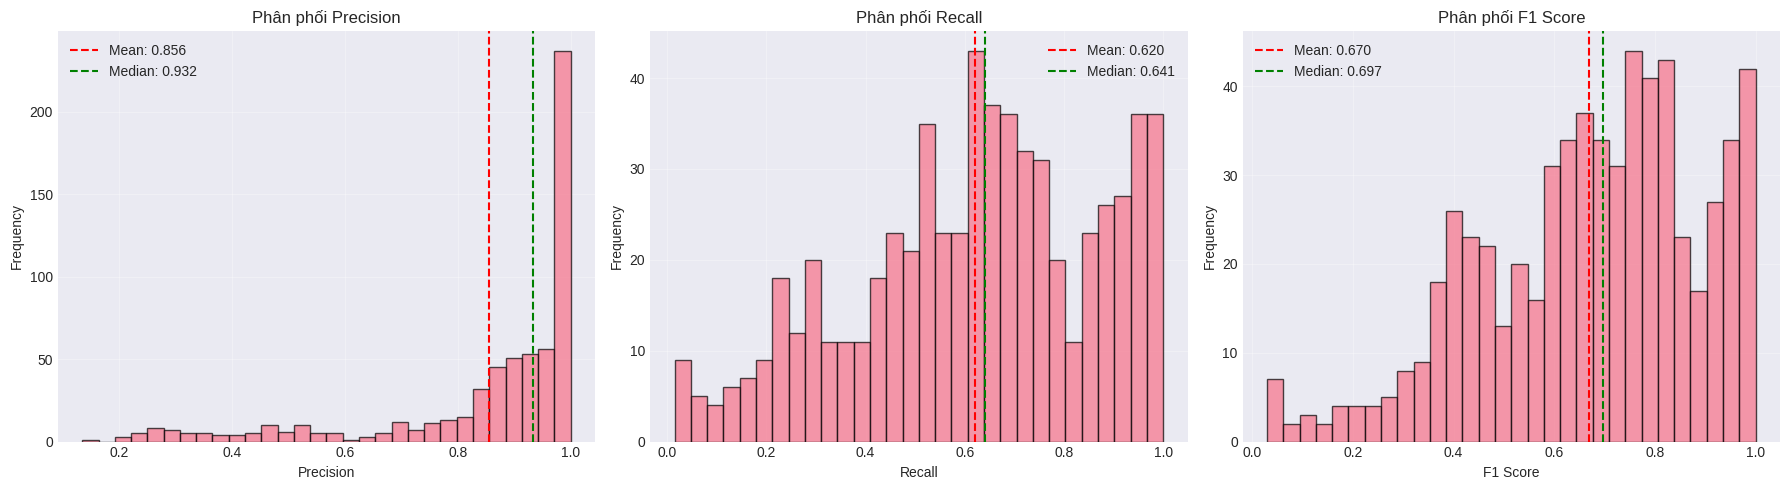

In [ ]:
# Phân tích hiệu suất tổng thể
print("=" * 80)
print("PHÂN TÍCH HIỆU SUẤT TỔNG THỂ")
print("=" * 80)

metrics = ['precision', 'recall', 'f1_score']
for metric in metrics:
    print(f"\n{metric.upper()}:")
    print(f"  Trung bình: {df[metric].mean():.4f}")
    print(f"  Trung vị: {df[metric].median():.4f}")
    print(f"  Độ lệch chuẩn: {df[metric].std():.4f}")
    print(f"  Min: {df[metric].min():.4f}")
    print(f"  Max: {df[metric].max():.4f}")

# Phân phối của các metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, metric in enumerate(metrics):
    axes[idx].hist(df[metric], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].axvline(df[metric].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df[metric].mean():.3f}')
    axes[idx].axvline(df[metric].median(), color='green', linestyle='--', 
                      label=f'Median: {df[metric].median():.3f}')
    axes[idx].set_xlabel(metric.replace('_', ' ').title())
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Phân phối {metric.replace("_", " ").title()}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Phân tích theo mô hình


PHÂN TÍCH HIỆU SUẤT THEO MÔ HÌNH

Top 10 mô hình theo F1 Score (trung bình):
                               f1_score_mean  f1_score_std  f1_score_count
model_name_formatted                                                      
o1LowReasoningAPI                   0.777030      0.187249               4
GPT-4o                              0.764454      0.174218              31
o1HighReasoningAPI                  0.761219      0.186645               4
Qwen2.5 32B                         0.753077      0.172027              31
o1                                  0.747571      0.198807              31
Gemini 1.5 Pro                      0.743365      0.182964              31
Llama 3.1 405B Instruct             0.738785      0.184256              30
Llama 3.1 70B Tulu 3 DPO            0.738223      0.200219              31
Llama 3.1 70B Tulu 3 PPO RLVF       0.730451      0.216556              30
Llama 3.1 70B Instruct              0.716186      0.188857              31


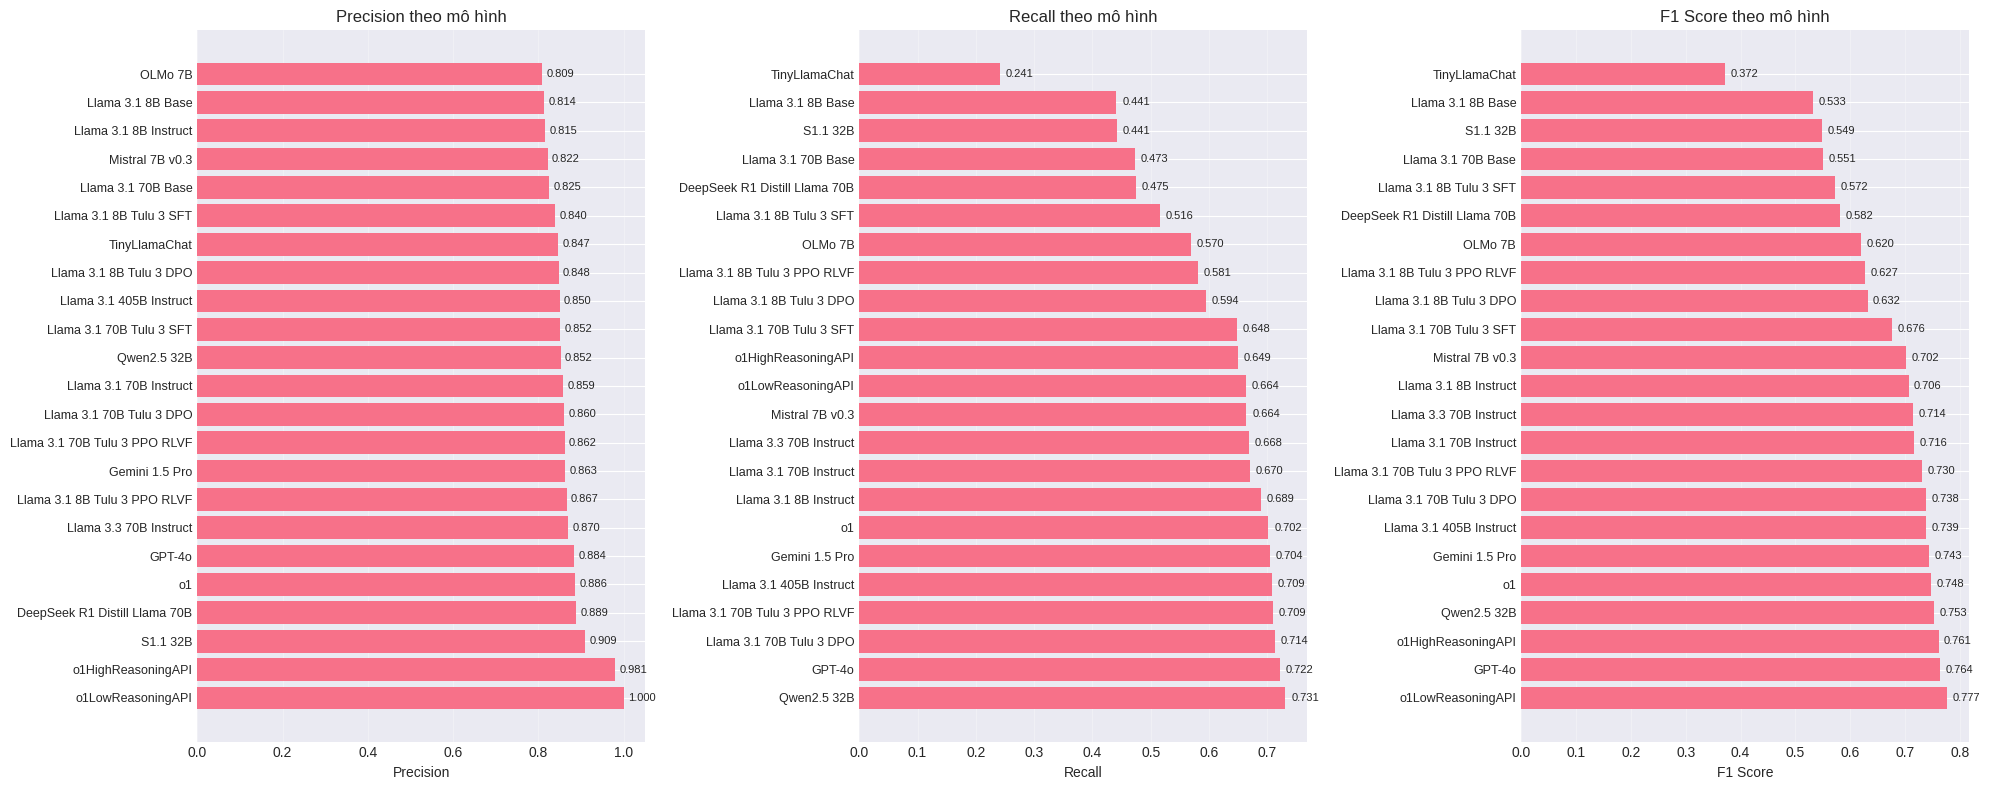

In [ ]:
# Phân tích hiệu suất theo mô hình
print("=" * 80)
print("PHÂN TÍCH HIỆU SUẤT THEO MÔ HÌNH")
print("=" * 80)

model_performance = df.groupby('model_name_formatted')[metrics].agg(['mean', 'std', 'count'])
model_performance.columns = ['_'.join(col).strip() for col in model_performance.columns.values]
model_performance = model_performance.sort_values('f1_score_mean', ascending=False)

print("\nTop 10 mô hình theo F1 Score (trung bình):")
print(model_performance[['f1_score_mean', 'f1_score_std', 'f1_score_count']].head(10))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
for idx, metric in enumerate(metrics):
    model_means = df.groupby('model_name_formatted')[metric].mean().sort_values(ascending=False)
    axes[idx].barh(range(len(model_means)), model_means.values)
    axes[idx].set_yticks(range(len(model_means)))
    axes[idx].set_yticklabels(model_means.index, fontsize=9)
    axes[idx].set_xlabel(metric.replace('_', ' ').title())
    axes[idx].set_title(f'{metric.replace("_", " ").title()} theo mô hình')
    axes[idx].grid(True, alpha=0.3, axis='x')
    
    # Thêm giá trị trên mỗi cột
    for i, v in enumerate(model_means.values):
        axes[idx].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()




Heatmap F1 Score: Mô hình vs Scenario


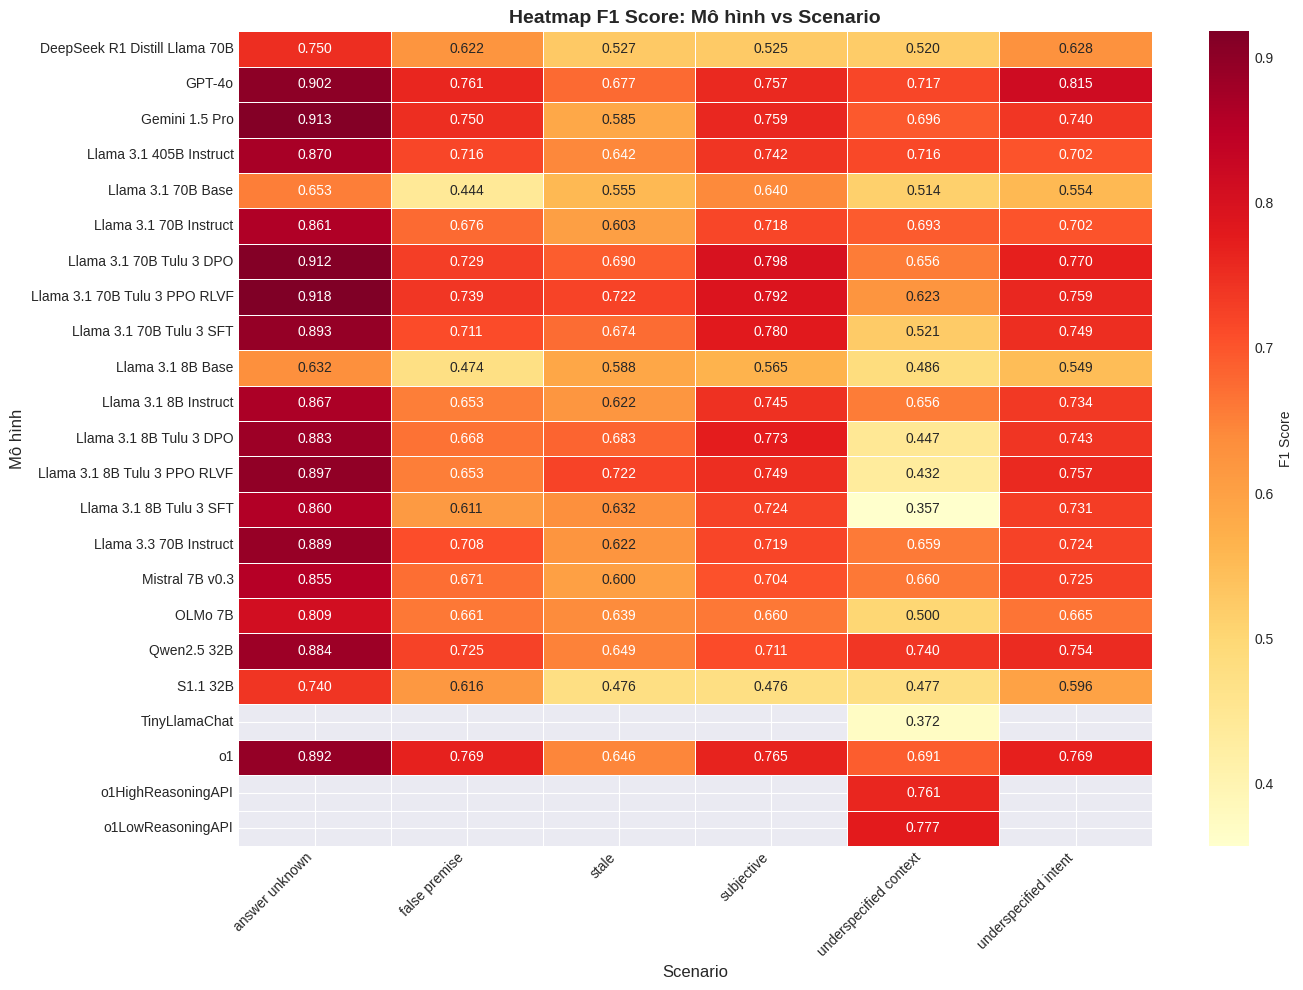

In [ ]:
# Heatmap of model performance by scenario
print("\n\nHeatmap F1 Score: Model vs Scenario")
scenario_model_f1 = df.pivot_table(
    values='f1_score', 
    index='model_name_formatted', 
    columns='scenario_label', 
    aggfunc='mean'
)

plt.figure(figsize=(14, 10))
sns.heatmap(scenario_model_f1, annot=True, fmt='.3f', cmap='YlOrRd', 
            cbar_kws={'label': 'F1 Score'}, linewidths=0.5)
plt.title('Heatmap F1 Score: Model vs Scenario', fontsize=14, fontweight='bold')
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 4. Phân tích theo Scenario


PHÂN TÍCH HIỆU SUẤT THEO SCENARIO

Hiệu suất theo scenario:
                        precision_mean  precision_std  precision_count  \
scenario_label                                                           
answer unknown                0.935685       0.060236              100   
underspecified intent         0.769300       0.194651               60   
subjective                    0.960993       0.077549               80   
false premise                 0.873357       0.070265               80   
stale                         0.693907       0.317825               40   
underspecified context        0.832164       0.232865              264   

                        recall_mean  recall_std  recall_count  f1_score_mean  \
scenario_label                                                                 
answer unknown             0.784370    0.180555           100       0.844071   
underspecified intent      0.689823    0.171707            60       0.708373   
subjective                 

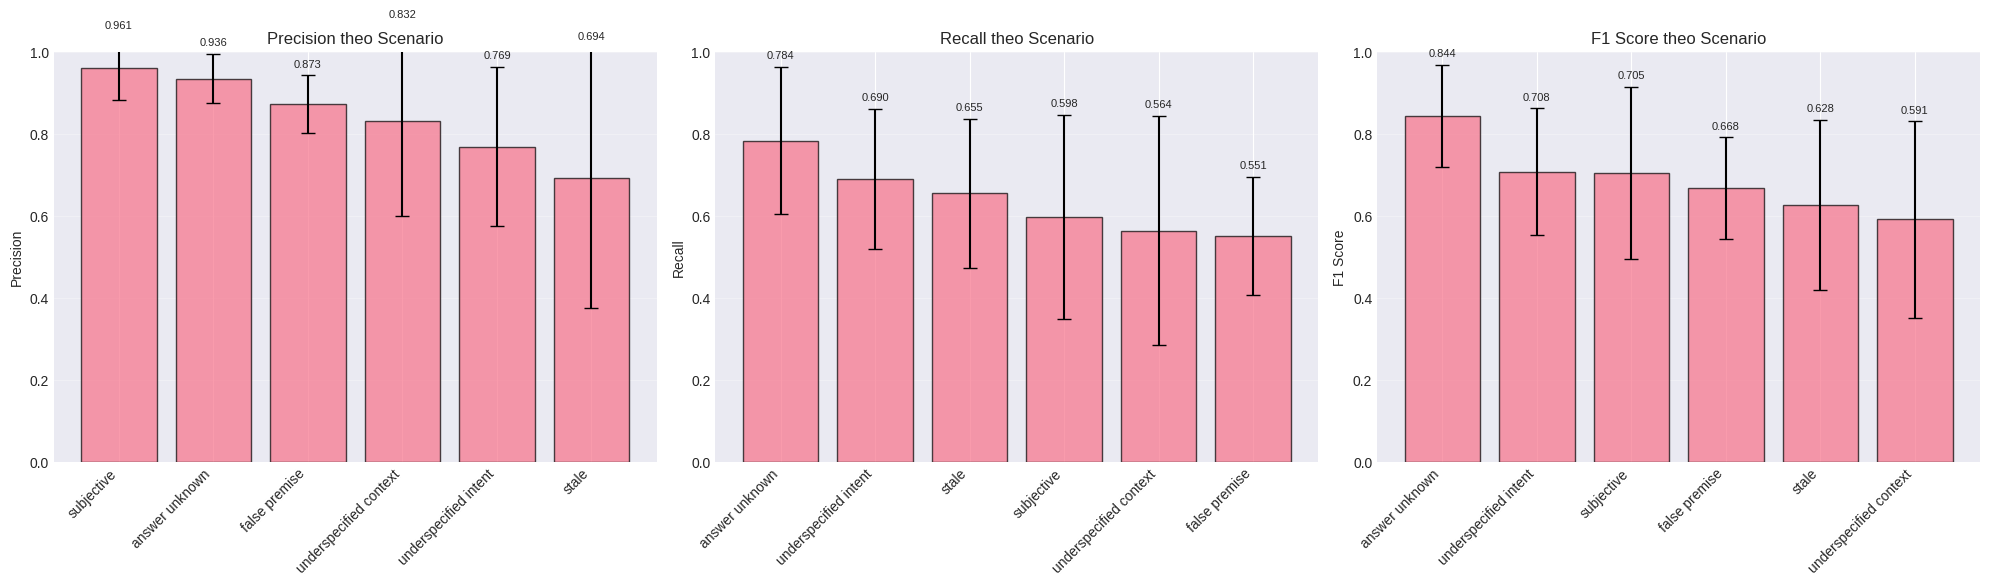

In [ ]:
# Performance analysis by scenario
print("=" * 80)
print("PERFORMANCE ANALYSIS BY SCENARIO")
print("=" * 80)

scenario_performance = df.groupby('scenario_label')[metrics].agg(['mean', 'std', 'count'])
scenario_performance.columns = ['_'.join(col).strip() for col in scenario_performance.columns.values]
scenario_performance = scenario_performance.sort_values('f1_score_mean', ascending=False)

print("\nPerformance by scenario:")
print(scenario_performance)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for idx, metric in enumerate(metrics):
    scenario_means = df.groupby('scenario_label')[metric].mean().sort_values(ascending=False)
    scenario_stds = df.groupby('scenario_label')[metric].std()
    
    bars = axes[idx].bar(range(len(scenario_means)), scenario_means.values, 
                        yerr=scenario_stds[scenario_means.index].values,
                        capsize=5, alpha=0.7, edgecolor='black')
    axes[idx].set_xticks(range(len(scenario_means)))
    axes[idx].set_xticklabels(scenario_means.index, rotation=45, ha='right')
    axes[idx].set_ylabel(metric.replace('_', ' ').title())
    axes[idx].set_title(f'{metric.replace("_", " ").title()} by Scenario')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_ylim(0, 1)
    
    # Add values on each bar
    for i, (v, std) in enumerate(zip(scenario_means.values, scenario_stds[scenario_means.index].values)):
        axes[idx].text(i, v + std + 0.02, f'{v:.3f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


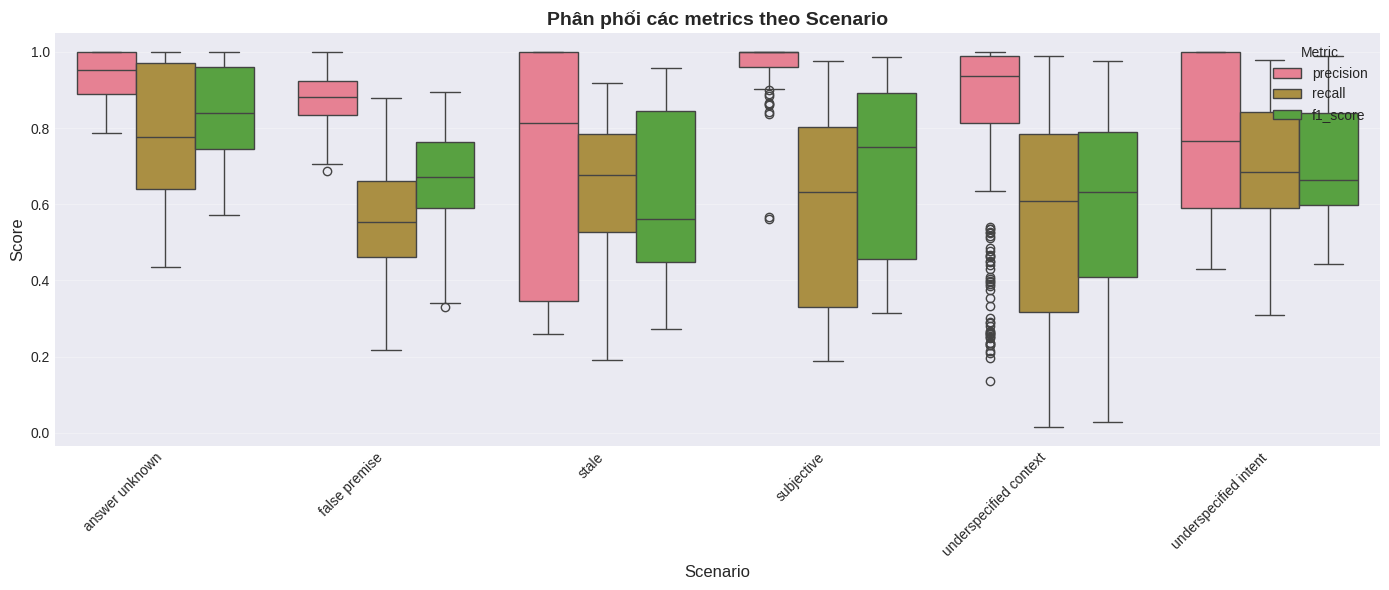

In [ ]:
# Box plot of F1 score distribution by scenario
plt.figure(figsize=(14, 6))
df_melted = df.melt(id_vars=['scenario_label'], value_vars=metrics, 
                    var_name='metric', value_name='score')
sns.boxplot(data=df_melted, x='scenario_label', y='score', hue='metric')
plt.title('Distribution of Metrics by Scenario', fontsize=14, fontweight='bold')
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', loc='upper right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## 5. Phân tích theo Dataset


PHÂN TÍCH HIỆU SUẤT THEO DATASET

Tổng số dataset: 31

Top 10 dataset có F1 Score cao nhất:
                            f1_score_mean  f1_score_std
dataset_name_formatted                                 
CoCoNot/Unknowns                 0.945541      0.092780
BB/Known unknowns                0.899485      0.123996
CoCoNot/Unsupported              0.882515      0.116581
CoCoNot/Humanizing               0.882371      0.141258
CoCoNot/Incomprehensible         0.880725      0.127832
GSM8K                            0.819754      0.210701
CoCoNot/Temporal                 0.816785      0.099873
CoCoNot/Subjective               0.808852      0.159981
BBQ                              0.794961      0.139363
CoCoNot/False presumptions       0.785867      0.114716

Top 10 dataset có F1 Score thấp nhất:
                        f1_score_mean  f1_score_std
dataset_name_formatted                             
GPQA-Diamond                 0.614384      0.200859
MMLU Math                    0.611280    

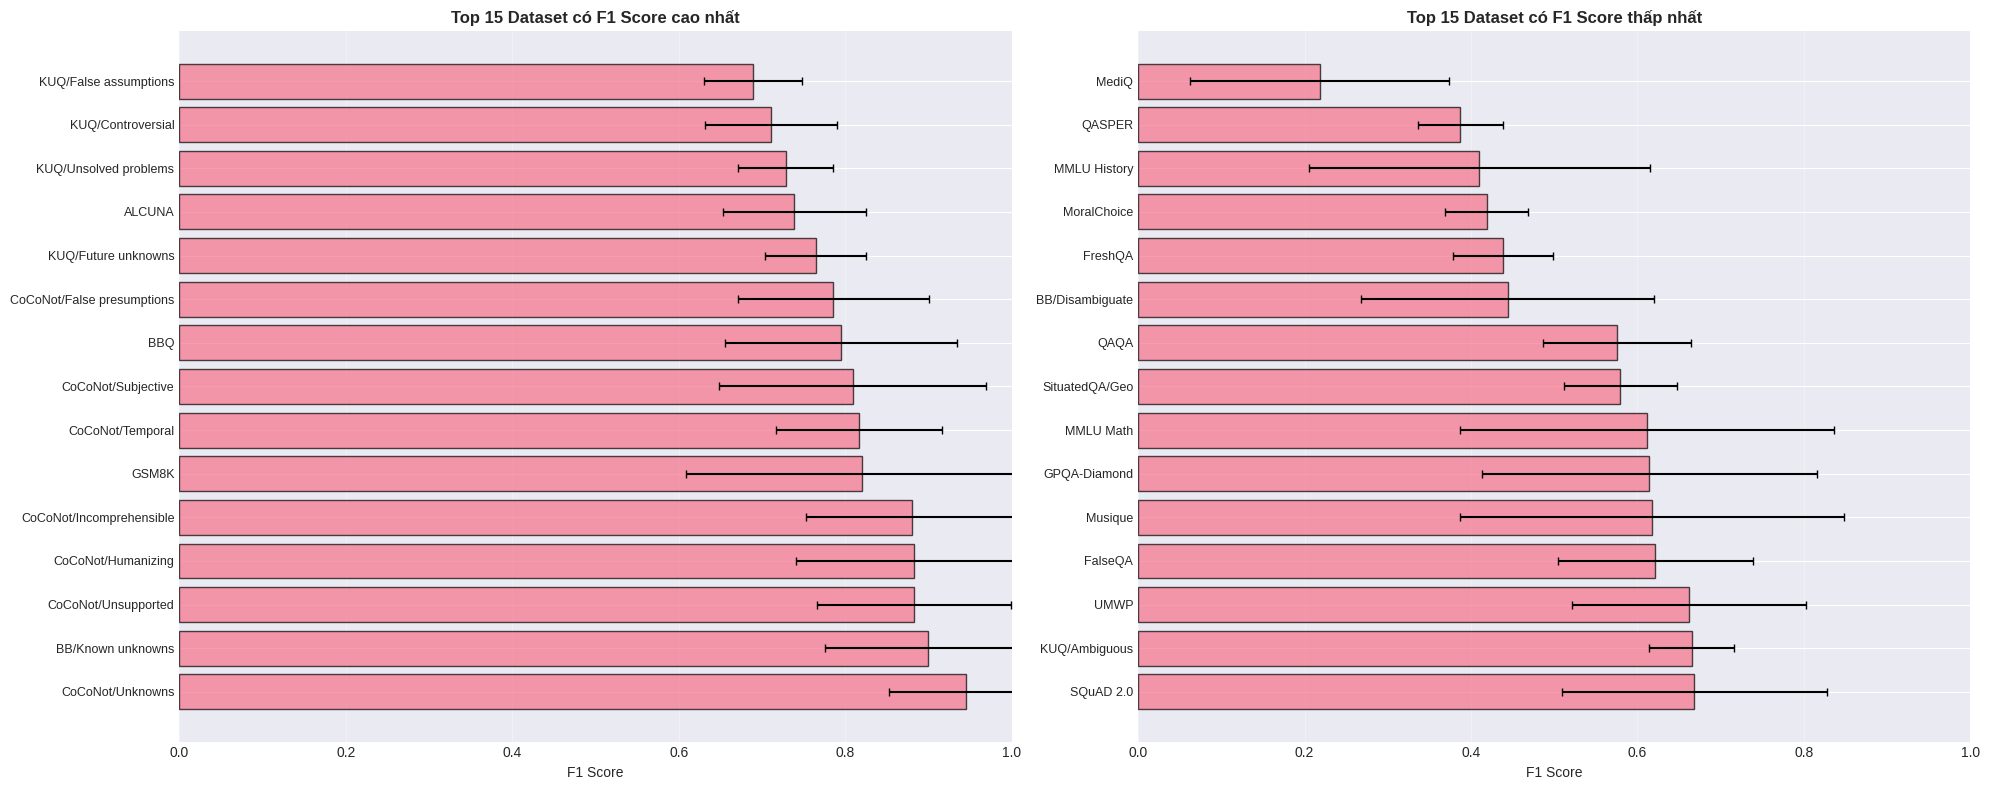

In [ ]:
# Performance analysis by dataset
print("=" * 80)
print("PERFORMANCE ANALYSIS BY DATASET")
print("=" * 80)

dataset_performance = df.groupby('dataset_name_formatted')[metrics].agg(['mean', 'std', 'count'])
dataset_performance.columns = ['_'.join(col).strip() for col in dataset_performance.columns.values]
dataset_performance = dataset_performance.sort_values('f1_score_mean', ascending=False)

print(f"\nTotal number of datasets: {len(dataset_performance)}")
print("\nTop 10 datasets with highest F1 Score:")
print(dataset_performance[['f1_score_mean', 'f1_score_std']].head(10))
print("\nTop 10 datasets with lowest F1 Score:")
print(dataset_performance[['f1_score_mean', 'f1_score_std']].tail(10))

# Visualization of top and bottom datasets
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top 15 datasets
top_datasets = dataset_performance.head(15)
axes[0].barh(range(len(top_datasets)), top_datasets['f1_score_mean'].values, 
            xerr=top_datasets['f1_score_std'].values, capsize=3, alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top_datasets)))
axes[0].set_yticklabels(top_datasets.index, fontsize=9)
axes[0].set_xlabel('F1 Score')
axes[0].set_title('Top 15 Datasets with Highest F1 Score', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].set_xlim(0, 1)

# Bottom 15 datasets
bottom_datasets = dataset_performance.tail(15)
axes[1].barh(range(len(bottom_datasets)), bottom_datasets['f1_score_mean'].values, 
            xerr=bottom_datasets['f1_score_std'].values, capsize=3, alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(bottom_datasets)))
axes[1].set_yticklabels(bottom_datasets.index, fontsize=9)
axes[1].set_xlabel('F1 Score')
axes[1].set_title('Top 15 Datasets with Lowest F1 Score', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()


## 6. Phân tích ảnh hưởng của Post-Training Stage


PHÂN TÍCH ẢNH HƯỞNG CỦA POST-TRAINING STAGE

Hiệu suất theo post-training stage:
                     precision_mean  precision_std  precision_count  \
post_training_stage                                                   
Instruct                   0.836931       0.217042               62   
DPO                        0.853864       0.206317               62   
PPO RLVF                   0.864106       0.204655               61   
SFT                        0.845580       0.221115               61   
Base                       0.819262       0.190410               60   

                     recall_mean  recall_std  recall_count  f1_score_mean  \
post_training_stage                                                         
Instruct                0.679607    0.205138            62       0.711304   
DPO                     0.653917    0.264710            62       0.684970   
PPO RLVF                0.644246    0.275594            61       0.677628   
SFT                     0.580640    

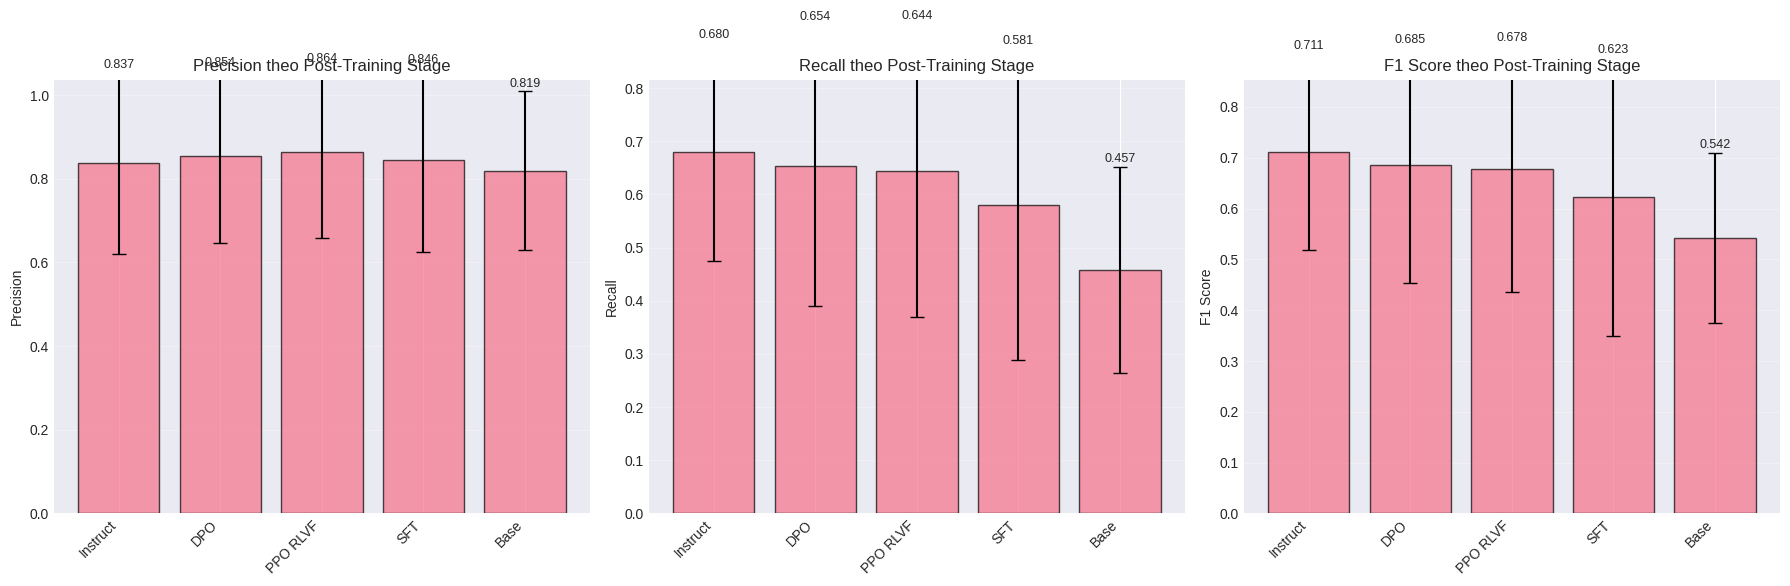



So sánh Base vs Instruct:
               Base  Instruct  Difference
precision  0.819262  0.836931    0.017668
recall     0.457116  0.679607    0.222491
f1_score   0.541899  0.711304    0.169405


In [ ]:
# Phân tích ảnh hưởng của post-training stage
print("=" * 80)
print("PHÂN TÍCH ẢNH HƯỞNG CỦA POST-TRAINING STAGE")
print("=" * 80)

# Lọc dữ liệu có post_training_stage không phải NA
df_with_stage = df[df['post_training_stage'] != 'NA'].copy()

if len(df_with_stage) > 0:
    stage_performance = df_with_stage.groupby('post_training_stage')[metrics].agg(['mean', 'std', 'count'])
    stage_performance.columns = ['_'.join(col).strip() for col in stage_performance.columns.values]
    stage_performance = stage_performance.sort_values('f1_score_mean', ascending=False)
    
    print("\nHiệu suất theo post-training stage:")
    print(stage_performance)
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    stages = stage_performance.index.tolist()
    
    for idx, metric in enumerate(metrics):
        means = [stage_performance.loc[stage, f'{metric}_mean'] for stage in stages]
        stds = [stage_performance.loc[stage, f'{metric}_std'] for stage in stages]
        
        bars = axes[idx].bar(range(len(stages)), means, yerr=stds, 
                            capsize=5, alpha=0.7, edgecolor='black')
        axes[idx].set_xticks(range(len(stages)))
        axes[idx].set_xticklabels(stages, rotation=45, ha='right')
        axes[idx].set_ylabel(metric.replace('_', ' ').title())
        axes[idx].set_title(f'{metric.replace("_", " ").title()} theo Post-Training Stage')
        axes[idx].grid(True, alpha=0.3, axis='y')
        axes[idx].set_ylim(0, max(means) * 1.2)
        
        # Thêm giá trị trên mỗi cột
        for i, (v, std) in enumerate(zip(means, stds)):
            axes[idx].text(i, v + std + 0.01, f'{v:.3f}', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # So sánh Base vs Instruct
    if 'Base' in stages and 'Instruct' in stages:
        print("\n\nSo sánh Base vs Instruct:")
        base_models = df_with_stage[df_with_stage['post_training_stage'] == 'Base']
        instruct_models = df_with_stage[df_with_stage['post_training_stage'] == 'Instruct']
        
        comparison = pd.DataFrame({
            'Base': [base_models[m].mean() for m in metrics],
            'Instruct': [instruct_models[m].mean() for m in metrics]
        }, index=metrics)
        comparison['Difference'] = comparison['Instruct'] - comparison['Base']
        print(comparison)
else:
    print("\nKhông có dữ liệu về post-training stage (tất cả đều là NA)")


PHÂN TÍCH TƯƠNG QUAN GIỮA CÁC METRICS

Ma trận tương quan:
           precision    recall  f1_score
precision   1.000000 -0.116616  0.419866
recall     -0.116616  1.000000  0.801680
f1_score    0.419866  0.801680  1.000000


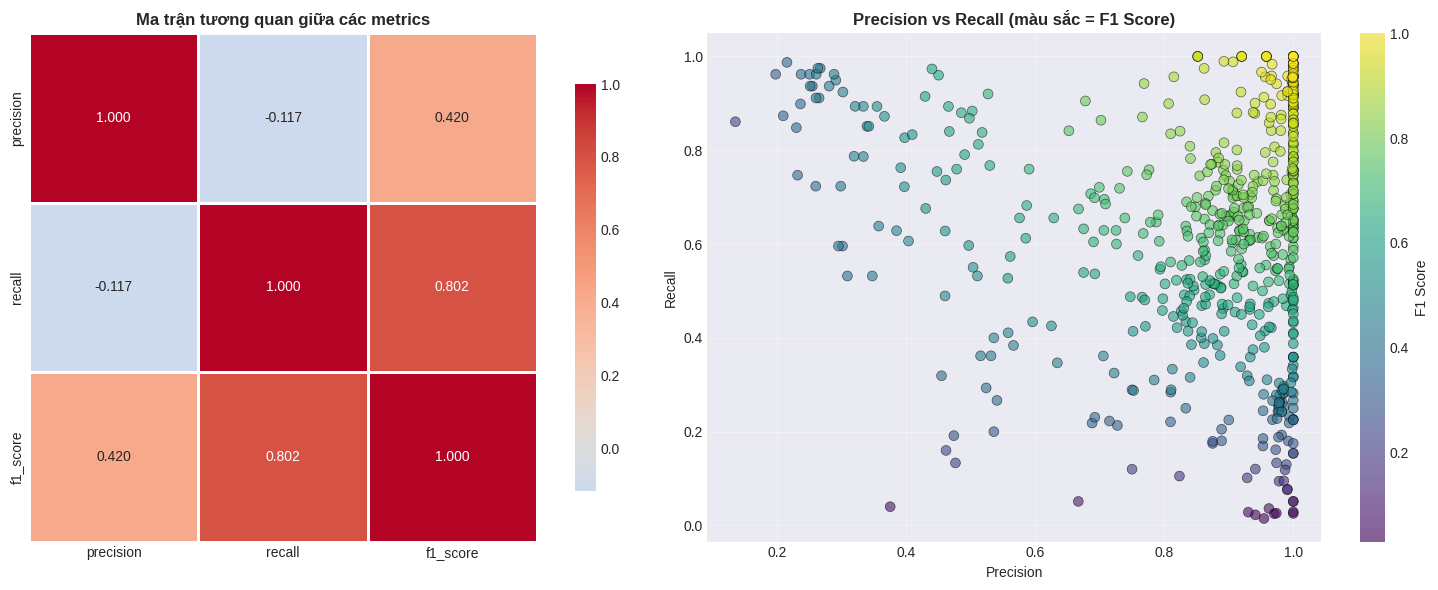


Tương quan Precision-Recall: -0.1166
Tương quan Precision-F1: 0.4199
Tương quan Recall-F1: 0.8017


In [ ]:
# Correlation analysis between metrics
print("=" * 80)
print("CORRELATION ANALYSIS BETWEEN METRICS")
print("=" * 80)

correlation_matrix = df[metrics].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Correlation Matrix Between Metrics', fontweight='bold')

# Scatter plot Precision vs Recall
scatter = axes[1].scatter(df['precision'], df['recall'], c=df['f1_score'], 
                         cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Precision')
axes[1].set_ylabel('Recall')
axes[1].set_title('Precision vs Recall (color = F1 Score)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1], label='F1 Score')

plt.tight_layout()
plt.show()

# Correlation statistics
print(f"\nPrecision-Recall correlation: {df['precision'].corr(df['recall']):.4f}")
print(f"Precision-F1 correlation: {df['precision'].corr(df['f1_score']):.4f}")
print(f"Recall-F1 correlation: {df['recall'].corr(df['f1_score']):.4f}")


## 8. Phân tích chi tiết: Mô hình tốt nhất và kém nhất


PHÂN TÍCH CHI TIẾT MÔ HÌNH

Mô hình tốt nhất (F1 Score cao nhất): o1LowReasoningAPI
Mô hình kém nhất (F1 Score thấp nhất): TinyLlamaChat

So sánh hiệu suất trung bình:
                      precision    recall  f1_score
model_name_formatted                               
TinyLlamaChat          0.846828  0.240673  0.371881
o1LowReasoningAPI      0.999785  0.663642  0.777030


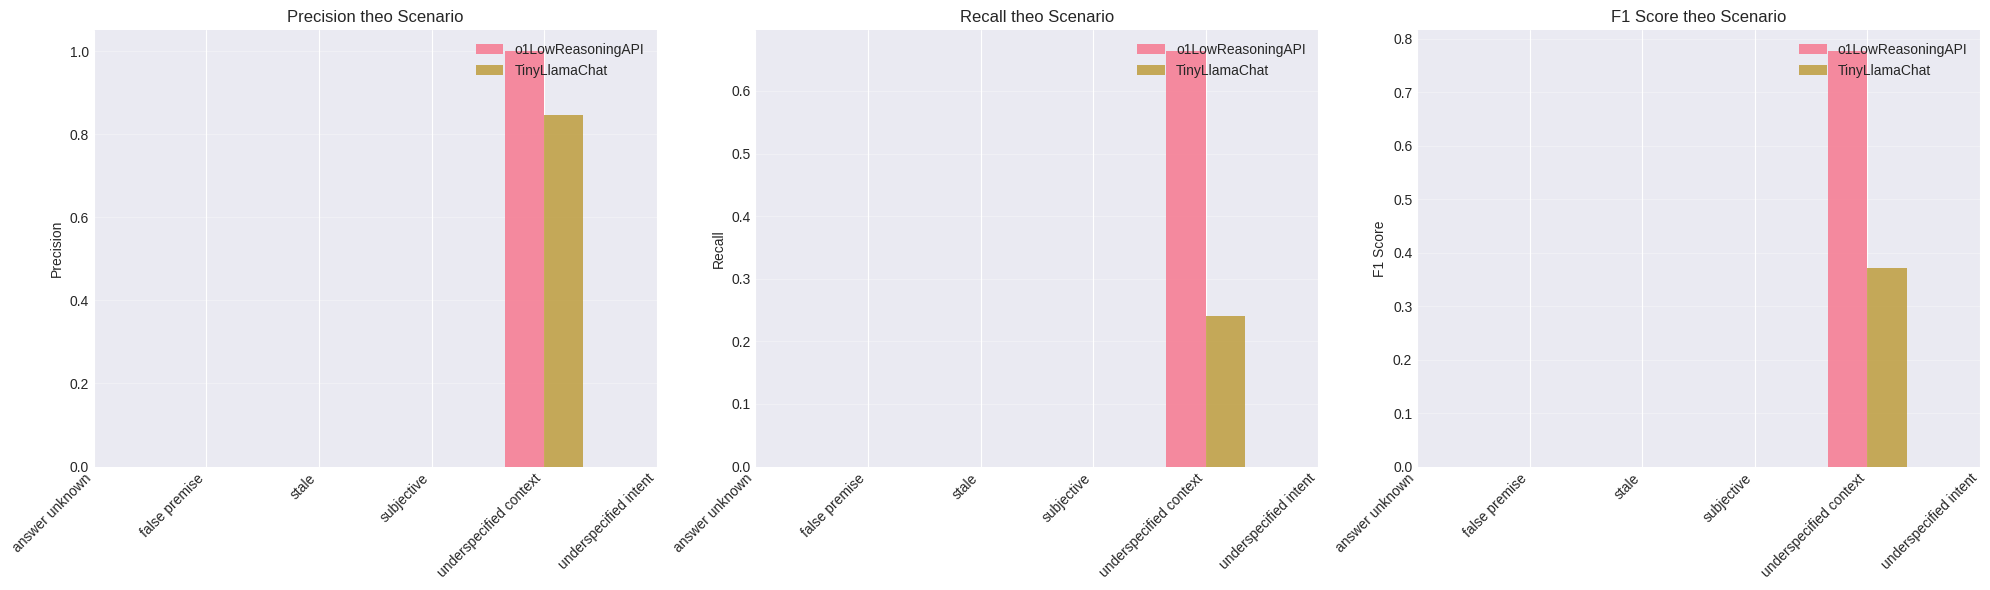

In [ ]:
# Xác định mô hình tốt nhất và kém nhất
best_model = model_performance.index[0]
worst_model = model_performance.index[-1]

print("=" * 80)
print("PHÂN TÍCH CHI TIẾT MÔ HÌNH")
print("=" * 80)
print(f"\nMô hình tốt nhất (F1 Score cao nhất): {best_model}")
print(f"Mô hình kém nhất (F1 Score thấp nhất): {worst_model}")

# So sánh chi tiết
comparison_df = df[df['model_name_formatted'].isin([best_model, worst_model])].copy()
comparison_summary = comparison_df.groupby('model_name_formatted')[metrics].mean()

print("\nSo sánh hiệu suất trung bình:")
print(comparison_summary)

# Visualization so sánh theo scenario
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
scenarios = df['scenario_label'].unique()

for idx, metric in enumerate(metrics):
    best_means = [comparison_df[(comparison_df['model_name_formatted'] == best_model) & 
                                (comparison_df['scenario_label'] == s)][metric].mean() 
                  for s in scenarios]
    worst_means = [comparison_df[(comparison_df['model_name_formatted'] == worst_model) & 
                                 (comparison_df['scenario_label'] == s)][metric].mean() 
                   for s in scenarios]
    
    x = np.arange(len(scenarios))
    width = 0.35
    
    axes[idx].bar(x - width/2, best_means, width, label=best_model, alpha=0.8)
    axes[idx].bar(x + width/2, worst_means, width, label=worst_model, alpha=0.8)
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(scenarios, rotation=45, ha='right')
    axes[idx].set_ylabel(metric.replace('_', ' ').title())
    axes[idx].set_title(f'{metric.replace("_", " ").title()} theo Scenario')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 9. Phân tích theo Scenario và Dataset kết hợp


PHÂN TÍCH KẾT HỢP SCENARIO VÀ DATASET

Top 15 kết hợp Scenario-Dataset có F1 Score cao nhất:
            scenario_label      dataset_name_formatted  f1_score
1           answer unknown            CoCoNot/Unknowns  0.945541
0           answer unknown           BB/Known unknowns  0.899485
2           answer unknown         CoCoNot/Unsupported  0.882515
11              subjective          CoCoNot/Humanizing  0.882371
28   underspecified intent    CoCoNot/Incomprehensible  0.880725
19  underspecified context                       GSM8K  0.819754
9                    stale            CoCoNot/Temporal  0.816785
12              subjective          CoCoNot/Subjective  0.808852
17  underspecified context                         BBQ  0.794961
5            false premise  CoCoNot/False presumptions  0.785867
3           answer unknown         KUQ/Future unknowns  0.764434
15  underspecified context                      ALCUNA  0.739111
4           answer unknown       KUQ/Unsolved problems  0.7283

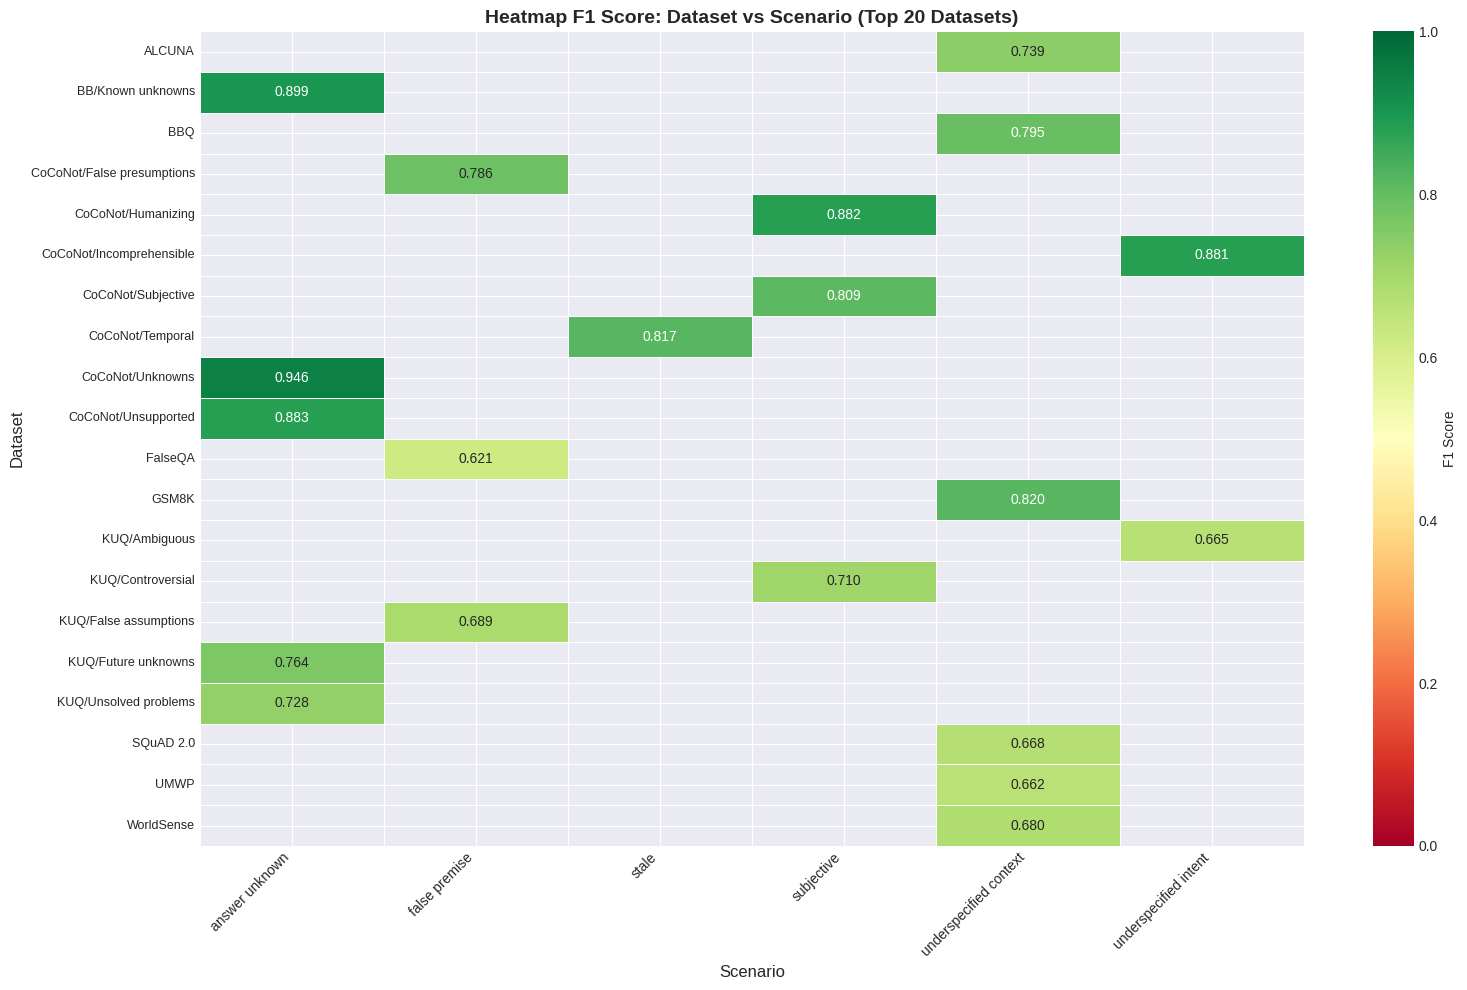

In [ ]:
# Phân tích kết hợp scenario và dataset
print("=" * 80)
print("PHÂN TÍCH KẾT HỢP SCENARIO VÀ DATASET")
print("=" * 80)

scenario_dataset_perf = df.groupby(['scenario_label', 'dataset_name_formatted'])['f1_score'].mean().reset_index()
scenario_dataset_perf = scenario_dataset_perf.sort_values('f1_score', ascending=False)

print("\nTop 15 kết hợp Scenario-Dataset có F1 Score cao nhất:")
print(scenario_dataset_perf.head(15))
print("\nTop 15 kết hợp Scenario-Dataset có F1 Score thấp nhất:")
print(scenario_dataset_perf.tail(15))

# Pivot table để visualization
pivot_table = df.pivot_table(
    values='f1_score', 
    index='dataset_name_formatted', 
    columns='scenario_label', 
    aggfunc='mean'
)

# Chỉ hiển thị một số dataset để dễ nhìn
top_datasets_list = dataset_performance.head(20).index.tolist()
pivot_subset = pivot_table.loc[pivot_table.index.isin(top_datasets_list)]

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_subset, annot=True, fmt='.3f', cmap='RdYlGn', 
            cbar_kws={'label': 'F1 Score'}, linewidths=0.5, vmin=0, vmax=1)
plt.title('Heatmap F1 Score: Dataset vs Scenario (Top 20 Datasets)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Dataset', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


## 10. Insights và Kết luận


In [ ]:
# Summary of insights
print("=" * 80)
print("INSIGHTS AND CONCLUSIONS")
print("=" * 80)

print("\n1. OVERALL PERFORMANCE:")
print(f"   - Average F1 Score: {df['f1_score'].mean():.4f}")
print(f"   - Average Precision: {df['precision'].mean():.4f}")
print(f"   - Average Recall: {df['recall'].mean():.4f}")

print("\n2. BEST MODEL:")
print(f"   - Model with highest F1 Score: {best_model}")
print(f"   - F1 Score: {model_performance.loc[best_model, 'f1_score_mean']:.4f}")

print("\n3. MOST DIFFICULT SCENARIO:")
worst_scenario = scenario_performance.index[-1]
print(f"   - Scenario with lowest F1 Score: {worst_scenario}")
print(f"   - F1 Score: {scenario_performance.loc[worst_scenario, 'f1_score_mean']:.4f}")

print("\n4. EASIEST SCENARIO:")
best_scenario = scenario_performance.index[0]
print(f"   - Scenario with highest F1 Score: {best_scenario}")
print(f"   - F1 Score: {scenario_performance.loc[best_scenario, 'f1_score_mean']:.4f}")

print("\n5. MOST DIFFICULT DATASET:")
worst_dataset = dataset_performance.index[-1]
print(f"   - Dataset with lowest F1 Score: {worst_dataset}")
print(f"   - F1 Score: {dataset_performance.loc[worst_dataset, 'f1_score_mean']:.4f}")

print("\n6. EASIEST DATASET:")
best_dataset = dataset_performance.index[0]
print(f"   - Dataset with highest F1 Score: {best_dataset}")
print(f"   - F1 Score: {dataset_performance.loc[best_dataset, 'f1_score_mean']:.4f}")

# Variability analysis
print("\n7. VARIABILITY:")
print(f"   - F1 Score standard deviation: {df['f1_score'].std():.4f}")
print(f"   - F1 Score range: {df['f1_score'].max() - df['f1_score'].min():.4f}")

# Precision-Recall trade-off analysis
high_precision = df[df['precision'] > 0.9]
high_recall = df[df['recall'] > 0.9]
print(f"\n8. PRECISION-RECALL TRADE-OFF:")
print(f"   - Number of results with Precision > 0.9: {len(high_precision)} ({len(high_precision)/len(df)*100:.1f}%)")
print(f"   - Number of results with Recall > 0.9: {len(high_recall)} ({len(high_recall)/len(df)*100:.1f}%)")
print(f"   - Number of results with both Precision and Recall > 0.9: {len(high_precision[high_precision['recall'] > 0.9])}")

print("\n" + "=" * 80)
print("END OF ANALYSIS")
print("=" * 80)


INSIGHTS VÀ KẾT LUẬN

1. HIỆU SUẤT TỔNG THỂ:
   - F1 Score trung bình: 0.6699
   - Precision trung bình: 0.8556
   - Recall trung bình: 0.6200

2. MÔ HÌNH TỐT NHẤT:
   - Mô hình có F1 Score cao nhất: o1LowReasoningAPI
   - F1 Score: 0.7770

3. SCENARIO KHÓ NHẤT:
   - Scenario có F1 Score thấp nhất: underspecified context
   - F1 Score: 0.5915

4. SCENARIO DỄ NHẤT:
   - Scenario có F1 Score cao nhất: answer unknown
   - F1 Score: 0.8441

5. DATASET KHÓ NHẤT:
   - Dataset có F1 Score thấp nhất: MediQ
   - F1 Score: 0.2180

6. DATASET DỄ NHẤT:
   - Dataset có F1 Score cao nhất: CoCoNot/Unknowns
   - F1 Score: 0.9455

7. ĐỘ BIẾN THIÊN:
   - Độ lệch chuẩn F1 Score: 0.2173
   - Khoảng biến thiên F1 Score: 0.9706

8. PRECISION-RECALL TRADE-OFF:
   - Số lượng kết quả có Precision > 0.9: 370 (59.3%)
   - Số lượng kết quả có Recall > 0.9: 100 (16.0%)
   - Số lượng kết quả có cả Precision và Recall > 0.9: 72

KẾT THÚC PHÂN TÍCH


## 11. Export kết quả phân tích

Có thể export các bảng thống kê ra file CSV để phân tích thêm hoặc báo cáo.


In [ ]:
# Export các bảng thống kê
current_dir = Path(os.getcwd())
if current_dir.name == 'analysis':
    output_dir = current_dir / "analysis_outputs"
else:
    output_dir = current_dir / "analysis" / "analysis_outputs"
output_dir.mkdir(exist_ok=True)

# Export model performance
model_performance.to_csv(output_dir / "model_performance_summary.csv")
print(f"Đã export model performance vào: {output_dir / 'model_performance_summary.csv'}")

# Export scenario performance
scenario_performance.to_csv(output_dir / "scenario_performance_summary.csv")
print(f"Đã export scenario performance vào: {output_dir / 'scenario_performance_summary.csv'}")

# Export dataset performance
dataset_performance.to_csv(output_dir / "dataset_performance_summary.csv")
print(f"Đã export dataset performance vào: {output_dir / 'dataset_performance_summary.csv'}")

# Export correlation matrix
correlation_matrix.to_csv(output_dir / "correlation_matrix.csv")
print(f"Đã export correlation matrix vào: {output_dir / 'correlation_matrix.csv'}")

print(f"\nTất cả các file đã được lưu trong thư mục: {output_dir}")


Đã export model performance vào: /home/admin1/Desktop/AbstentionBench/analysis/analysis_outputs/model_performance_summary.csv
Đã export scenario performance vào: /home/admin1/Desktop/AbstentionBench/analysis/analysis_outputs/scenario_performance_summary.csv
Đã export dataset performance vào: /home/admin1/Desktop/AbstentionBench/analysis/analysis_outputs/dataset_performance_summary.csv
Đã export correlation matrix vào: /home/admin1/Desktop/AbstentionBench/analysis/analysis_outputs/correlation_matrix.csv

Tất cả các file đã được lưu trong thư mục: /home/admin1/Desktop/AbstentionBench/analysis/analysis_outputs
